In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("ERBB_bioactivity_data_pubchem.csv")

df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pAC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
75,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
76,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
77,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879


In [5]:
X = df.drop('pAC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
75,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
76,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = df.pAC50
Y

0     4.522879
1     3.522879
2     4.522879
3     4.522879
4     4.522879
        ...   
74    4.522879
75    4.522879
76    4.522879
77    4.522879
78    4.522879
Name: pAC50, Length: 79, dtype: float64

In [7]:
X.shape

(79, 881)

In [8]:
Y.shape

(79,)

# Removing Large Variance Features

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

X.shape

(79, 204)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((63, 204), (63,))

In [13]:
X_test.shape, Y_test.shape

((16, 204), (16,))

In [23]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.17643911443794713

In [24]:
Y_pred = model.predict(X_test)

# Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

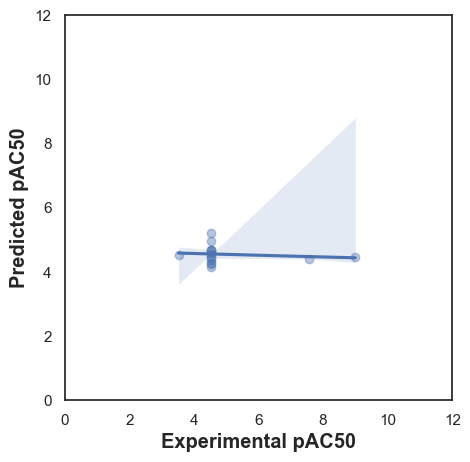

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pAC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pAC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show